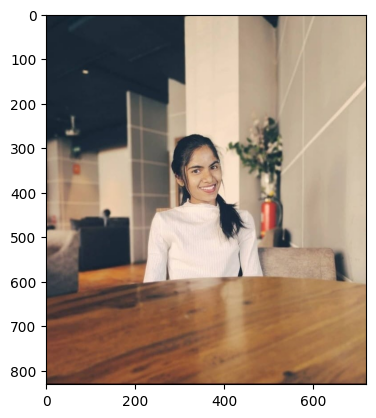

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import an image
img = cv2.imread("../project part 2/Vaishnavi.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Let's do the conversion in imshow
plt.imshow(img)


Let's analyze the full image's HSV histogram.

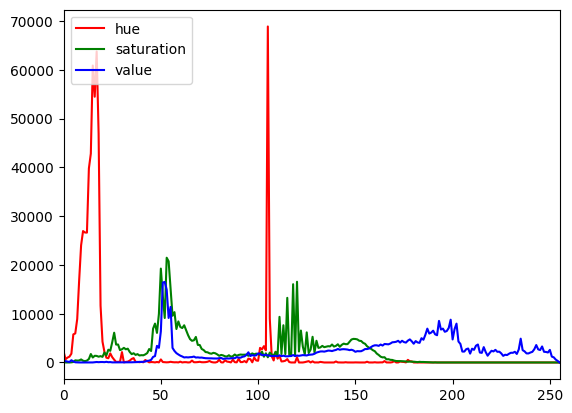

In [2]:
# Convert to HSV
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

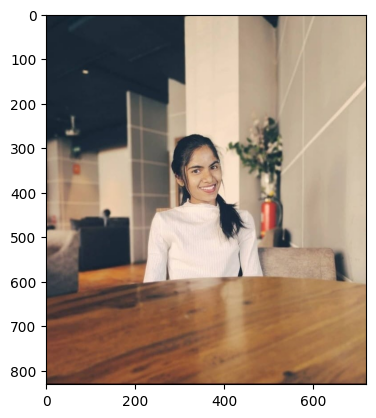

In [3]:
# Import the face image.
img = cv2.imread("../project part 2/Vaishnavi.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image.
plt.imshow(img)

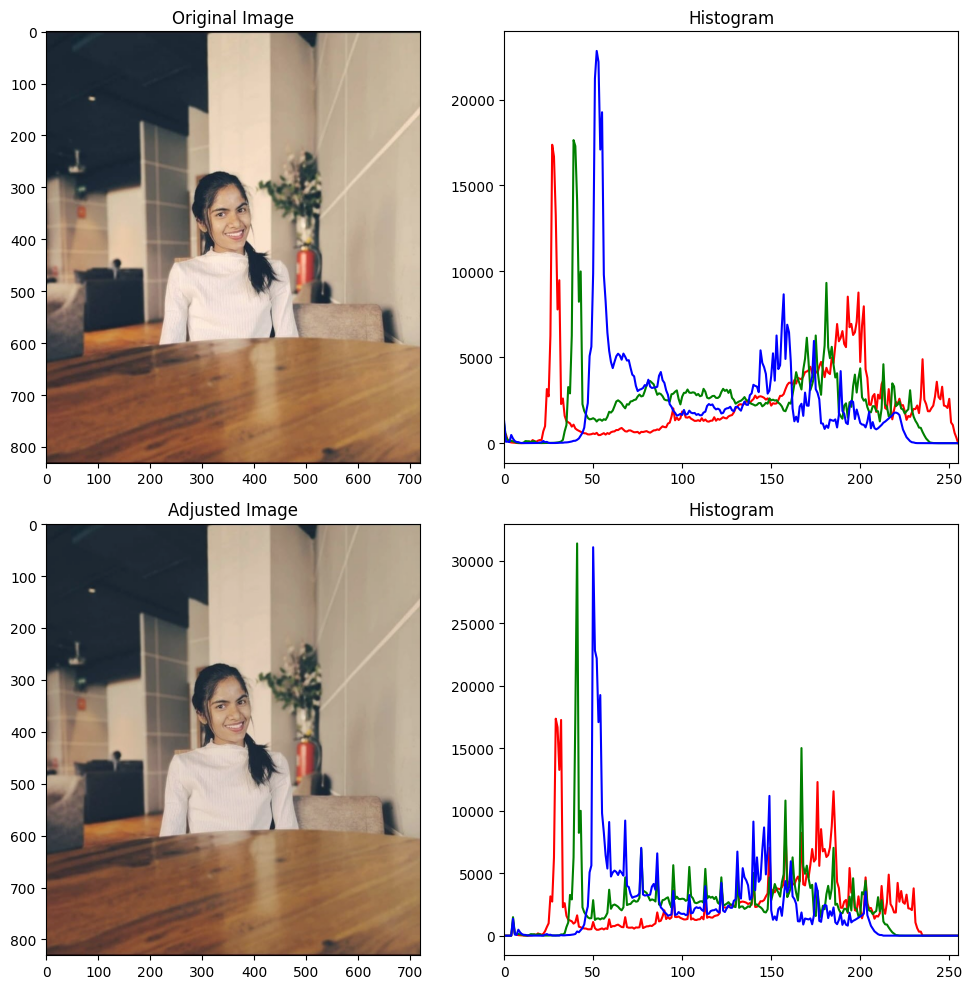

In [4]:
#function to adjust brightness and contrast
def adjust_brightness_contrast(image_array, alpha, beta):
    temp = image_array.astype('float32')
    temp *= alpha
    temp += beta
    temp = np.clip(temp, 0, 255)
    return temp.astype('uint8')

#Reading the image
img = cv2.imread("../project part 2/Vaishnavi.jpg")
#Converting image frim BGR to RGB colorspace
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#specifying figure size
plt.figure(figsize=(10,10))
#creating a subplot within a grid of subplots
plt.subplot(2, 2, 1)
plt.imshow(img)
#Setting title of the image
plt.title('Original Image')

hist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.subplot(2, 2, 2)
plt.plot(hist,color="red")
plt.xlim([0,255])
hist = cv2.calcHist([img],[1],None,[256],[0,255])
plt.subplot(2, 2, 2)
plt.plot(hist,color="green")
plt.xlim([0,255])

hist = cv2.calcHist([img],[2],None,[256],[0,255])
plt.subplot(2, 2, 2)
plt.plot(hist,color="blue")
plt.xlim([0,255])
plt.title('Histogram')

#adjust image by calling the function with the values passed as parameters
adjusted_img = adjust_brightness_contrast(img, .9, 5)

#Plotting for adjusted image
plt.subplot(2, 2, 3)
plt.imshow(adjusted_img, vmin=0, vmax=255)
plt.title('Adjusted Image')

adjusted_hist = cv2.calcHist([adjusted_img],[0],None,[256],[0,255])
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist,color="red")
plt.xlim([0,255])
adjusted_hist = cv2.calcHist([adjusted_img],[1],None,[256],[0,255])
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist,color="green")
plt.xlim([0,255])

adjusted_hist = cv2.calcHist([adjusted_img],[2],None,[256],[0,255])
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist,color="blue")
plt.xlim([0,255])
plt.title('Histogram')

plt.tight_layout()
#Displaying the image
plt.show()


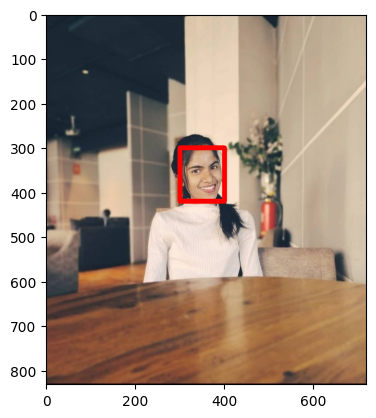

In [5]:
# Rectangle OpenCv function
# cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Top left corner of rectangle
top_left = (300,300)

# Bottom right corner of rectangle
bottom_right = (400,420)

# Color
rect_color = (255,0,0)

# Thickness
thickness = 9

# Rectangle function
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Plot image
plt.imshow(img_rect)

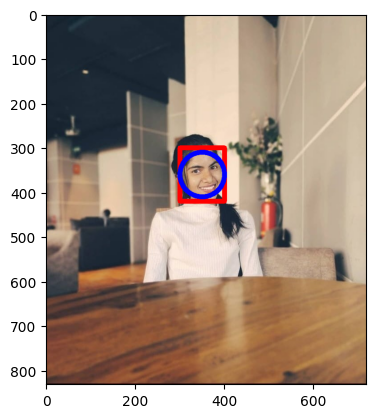

In [6]:
# Circle function
# cv2.circle(img, center_circle, radius, circle_color, thickness)

# Center of circle
center_circle = (350,360)

# Radius of the circle
radius = 50

# Color
circle_color = (0, 0, 255)

# Add circle to image
img_circle = cv2.circle(img, center_circle, radius, circle_color, thickness)


# Plot image
plt.imshow(img_circle)

First let's using Python array slicing to crop out a portion of our image. 

In [9]:
# Paste the rectangle coordinates so you can reference them.

# Top left corner of rectangle
# top_left = (45,25)

# Bottom right corner of rectangle
# bottom_right = (150,175)

# Import the face image.
img = cv2.imread("../project part 2/Vaishnavi.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


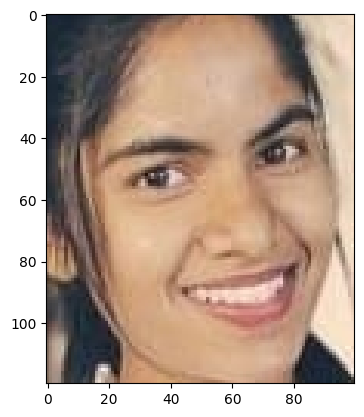

In [10]:
img_masked = img[300:420, 300:400]

plt.imshow(img_masked)

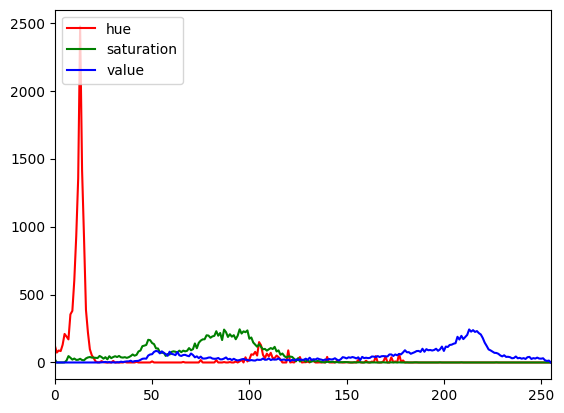

In [11]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

Let's create a mask using a separate array that is a binary image.  Each pixel is either 0 or 255. 

In [14]:
#Create an empty 2D array filled with zeros the same shape as our image.  Notice we are defining the data type as uint8 now!
mask = np.zeros(img.shape[:2], np.uint8) 

# Set the masked to white. Remember black is 0 and white is 255 is 8 bit color.

mask[300:420, 300:400] = 255

# Image shape to confirm it's the same size as our image.
print(mask.shape)

(831, 720)


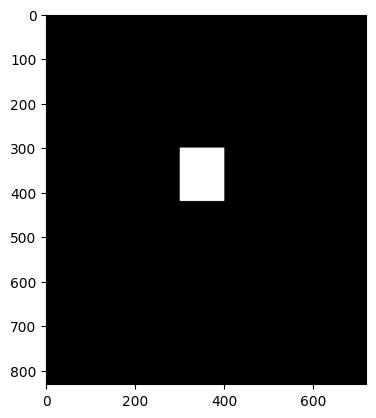

In [15]:
# Plot mask. Make sure you tell matplotlib that you it only contains gray values.  
plt.imshow(mask, cmap="gray")

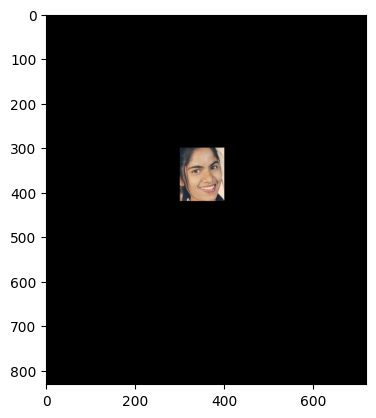

In [16]:
# Let's add our mask to our image.

# Import the face image again.
img = cv2.imread("../project part 2/Vaishnavi.jpg")

# Convert our image to RGB so we can plot it.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand. 
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0. 
# First image to compare.  Second image to compare.  Mask to use. 
img_masked = cv2.bitwise_and(img, img, mask=mask)

# Plot the masked image.
plt.imshow(img_masked)

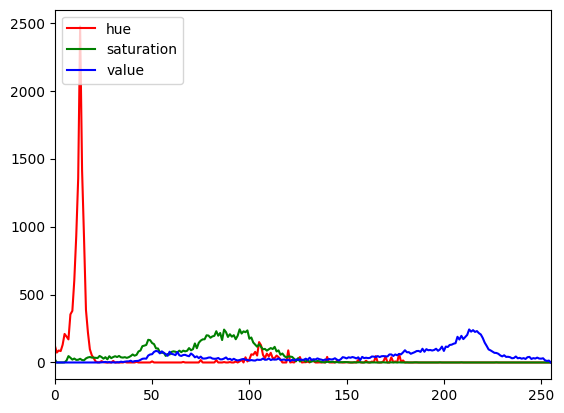

In [17]:
# Create a histogram of HSV values.
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

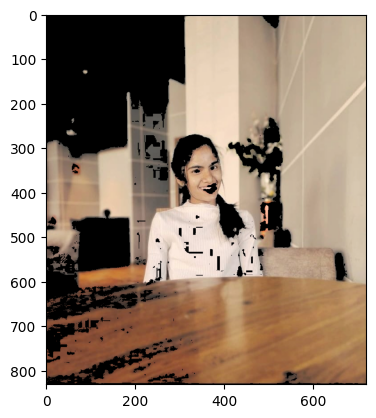

In [22]:
img = cv2.imread("../project part 2/Vaishnavi.jpg")
#BGR to RGB
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#RGB to HSB
Img_HSV=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

#HSV values
HSV_Minim = np.array([8, 0, 0], np.uint8)
# Maximum HSV 
HSV_Maxim = np.array([25, 255, 255], np.uint8)

#Binary mask Creation
Area_Img = cv2.inRange(Img_HSV, HSV_Minim, HSV_Maxim)

#Bitwise
HSV_Color = cv2.bitwise_and(Img_HSV, Img_HSV, mask=Area_Img)
#HSV to RGB
HSV_Color = cv2.cvtColor(HSV_Color, cv2.COLOR_HSV2RGB)
#Final Image
plt.imshow(HSV_Color)